# Tutorial 8: Subduction Model
 
Rebecca Farrington rebecca.farrington (at) unimelb.edu.au

This two dimensional subduction model has a dense, high viscosity 3 layered plate overlying a lower viscosity mantle. The upper and lower plate layers have a visco-plastic rheology, yielding under large stresses. The middle, core layer has a viscous only rheology, maintaining strength during bending. The top 1000 km of the mantle is included, the upper & lower mantle is partitioned with a viscosity contrast of 100x at 600 km depth. The velocity boundary conditions on the domain are period side, free-slip top and no-slip bottom wall. 

**References**

1. OzBench, M.; Regenauer-Lieb, K.; Stegman, D. R.; Morra, G.; Farrington, R.; Hale, A.; May, D. A.; Freeman, J.; Bourgouin, L.; Mühlhaus, H. & Moresi, L. A model comparison study of large-scale mantle-lithosphere dynamics driven by subduction. Physics of the Earth and Planetary Interiors, 2008, 171, 224-234. [OzBench, 2008](http://www.sciencedirect.com/science/article/pii/S0031920108002318)

In [1]:
from underworld import UWGeodynamics as GEO
from underworld import visualisation as vis

loaded rc file /opt/venv/lib/python3.7/site-packages/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

## Scaling

In [3]:
model_length = 1000. * u.kilometer
refDensity = 3300. * u.kilogram / u.meter**3
refViscosity = 1.4e19 * u.pascal * u.second

KL = model_length
KM = refDensity * KL**3
Kt = 1.0 / (refViscosity / KM * KL)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

# Model Geometry

In [4]:
Model = GEO.Model(elementRes=(288, 128), 
                  minCoord=(0. * u.kilometer,  400. * u.kilometer), 
                  maxCoord=(4000. * u.kilometer, 1000. * u.kilometer),
                  periodic = [True, False],
                  gravity=(0.0, -10. * u.meter / u.second**2))

In [5]:
Model.outputDir="outputs_tutorial8"

In [6]:
upperMantleShape = GEO.shapes.Layer2D(top=Model.top, bottom=400. * u.kilometer)
upperSlabShape = GEO.shapes.Polygon([(1200. * u.kilometer, 1000. * u.kilometer),
                                     (3400. * u.kilometer, 1000. * u.kilometer),
                                     (3350. * u.kilometer, 975. * u.kilometer),
                                     (1200. * u.kilometer, 975. * u.kilometer),
                                     (1020. * u.kilometer, 900. * u.kilometer),
                                     (1020. * u.kilometer, 925. * u.kilometer)])
lowerSlabShape = GEO.shapes.Polygon([(1200. * u.kilometer, 925. * u.kilometer),
                                     (3250. * u.kilometer, 925. * u.kilometer),
                                     (3200. * u.kilometer, 900. * u.kilometer),
                                     (1200. * u.kilometer, 900. * u.kilometer),
                                     (1020. * u.kilometer, 825. * u.kilometer),
                                     (1020. * u.kilometer, 850. * u.kilometer)])
coreSlabShape = GEO.shapes.Polygon([(1200. * u.kilometer, 975. * u.kilometer),
                                    (3350. * u.kilometer, 975. * u.kilometer),
                                    (3250. * u.kilometer, 925. * u.kilometer),
                                    (1200. * u.kilometer, 925. * u.kilometer),
                                    (1020. * u.kilometer, 850. * u.kilometer),
                                    (1020. * u.kilometer, 900. * u.kilometer)])

In [7]:
upperMantle = Model.add_material(name="Upper Mantle", shape=upperMantleShape)
upperSlab   = Model.add_material(name="Upper Slab", shape=upperSlabShape)
lowerSlab   = Model.add_material(name="Lower Slab", shape=lowerSlabShape)
coreSlab    = Model.add_material(name="Core Slab", shape=coreSlabShape)


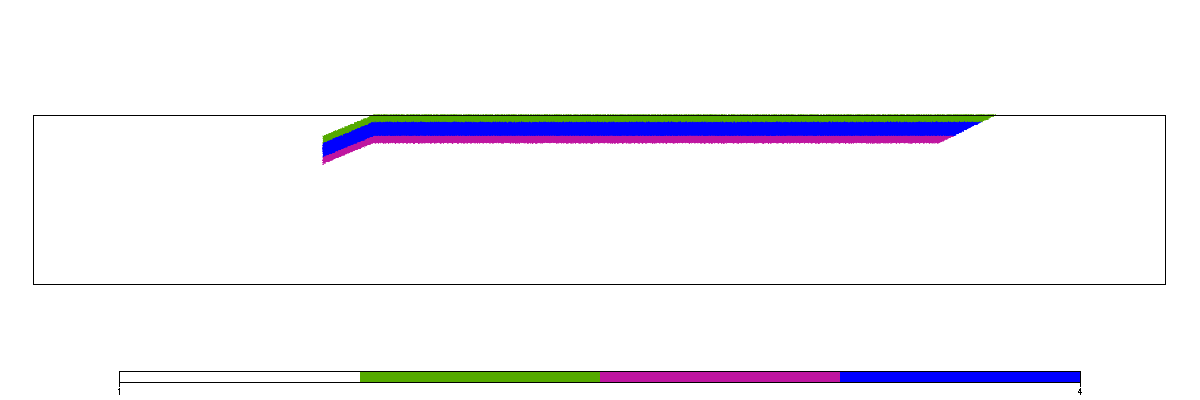

In [10]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, Model.materialField, colours='white green red purple blue', fn_size=2.0, discrete=True)
Fig.show()

## Densities

In [11]:
upperMantle.density = 3300 * u.kilogram / u.metre**3
upperSlab.density   = 3380 * u.kilogram / u.metre**3
lowerSlab.density   = 3380 * u.kilogram / u.metre**3
coreSlab.density    = 3380 * u.kilogram / u.metre**3

## Viscosities

In [12]:
upperMantle.viscosity = 1.4e19 * u.pascal * u.second
upperSlab.viscosity   = 200 * 1.4e19 * u.pascal * u.second
lowerSlab.viscosity   = 200 * 1.4e19 * u.pascal * u.second
coreSlab.viscosity    = 20000 * 1.4e19 * u.pascal * u.second

## Plasticity

In [13]:
upperSlab.plasticity = GEO.VonMises(cohesion=48. * u.megapascal)
lowerSlab.plasticity = GEO.VonMises(cohesion=48. * u.megapascal)

## Elasticity

In [14]:
coreSlab.elasticity = GEO.Elasticity(shear_modulus=4.*u.gigapascal, observation_time=20000. * u.year)

## Boundary conditions

In [15]:
Model.set_velocityBCs(bottom=[0.,0.], top=[None, 0.])


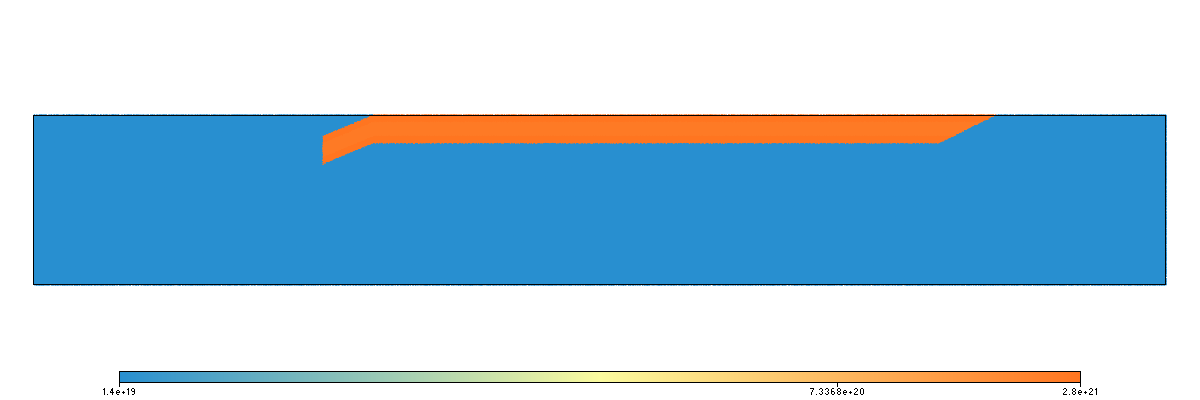

In [17]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, GEO.dimensionalise(Model.viscosityField, u.pascal * u.second), fn_size=2.0, logScale=True)
Fig.show()

In [14]:
Model.solver.set_inner_method("lu")

In [ ]:
Model.run_for(50000.* u.years)